In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(r"A:\GithuB\Credit Card Spending Analysis\data\Credit card transactions.csv")
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [3]:
df.shape

(26052, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [6]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Data Cleaning & Preprocessing

In [8]:
# Convert the 'Date' to Date time
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y", errors='coerce')

In [9]:
# Strip whitespaces & standardize columns
df['City'] = df['City'].str.strip()
df['Card Type'] = df['Card Type'].str.strip()
df['Exp Type'] = df['Exp Type'].str.strip()

In [10]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

## Exploratory Data Analysis

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

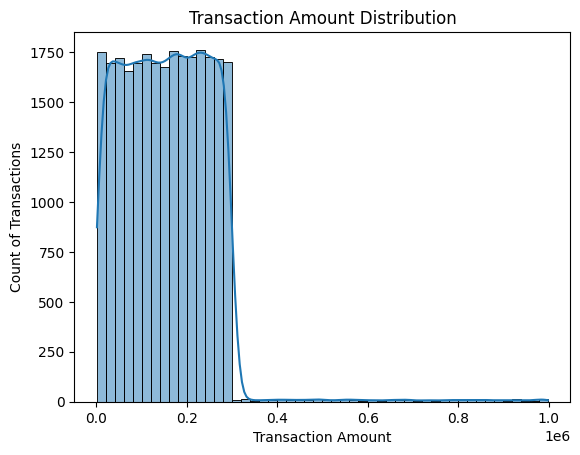

In [13]:
sns.histplot(data=df, x='Amount', bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Count of Transactions")
plt.show()

In [14]:
## Time Series Transactions
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('YearMonth')['Amount'].sum()
monthly_trend

YearMonth
2013-10    207360092
2013-11    192015963
2013-12    214267829
2014-01    207650982
2014-02    189220180
2014-03    203233307
2014-04    208284732
2014-05    201762312
2014-06    191321039
2014-07    197981416
2014-08    218453126
2014-09    209561433
2014-10    212485915
2014-11    212092005
2014-12    202667586
2015-01    223558574
2015-02    194292444
2015-03    206821139
2015-04    208110002
2015-05    173693297
Freq: M, Name: Amount, dtype: int64

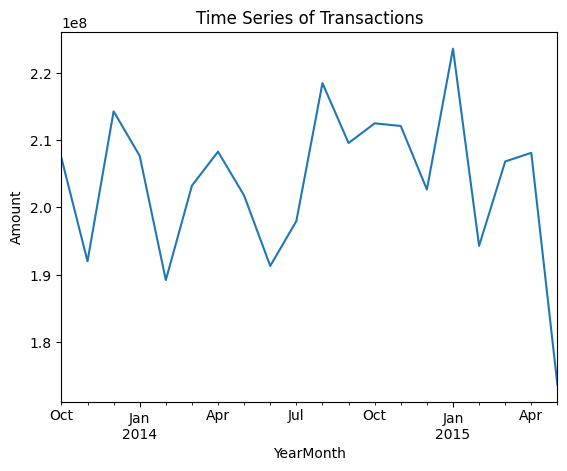

In [15]:
monthly_trend.plot(title="Time Series of Transactions")
plt.ylabel('Amount')
plt.show()

In [16]:
df['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

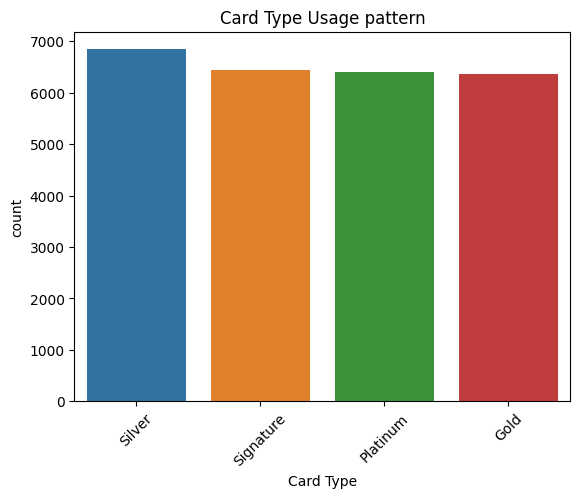

In [17]:
## Card Type Usage
sns.countplot(data=df, x='Card Type', order=df['Card Type'].value_counts().index)
plt.title("Card Type Usage pattern")
plt.xticks(rotation=45)
plt.show()

In [18]:
df['Exp Type'].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

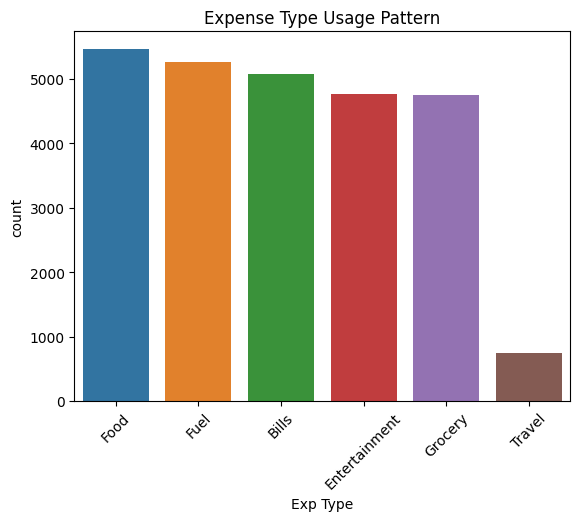

In [19]:
## For what Expense Types are Credit Cards used?
sns.countplot(data=df, x='Exp Type', order=df['Exp Type'].value_counts().index)
plt.title("Expense Type Usage Pattern")
plt.xticks(rotation=45)
plt.show()

In [20]:
gender_usage = df.groupby('Gender')['Amount'].sum()
gender_usage

Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64

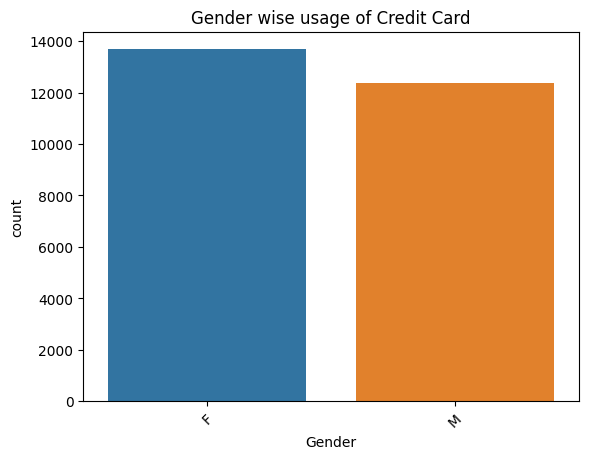

In [21]:
# Specifically Gender wise who uses this cards most often?
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title("Gender wise usage of Credit Card")
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [23]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,YearMonth,Year,Month,Day,Weekday
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014-10,2014,10,29,2
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014-08,2014,8,22,4
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014-08,2014,8,27,2
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014-04,2014,4,12,5
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015-05,2015,5,5,1


In [24]:
df_encoded = pd.get_dummies(df, columns=['City', 'Card Type', 'Exp Type', 'Gender'], drop_first=True)
df_encoded.head()

,index,Date,Amount,YearMonth,Year,Month,Day,Weekday,"City_Adilabad, India","City_Adityapur, India",...,"City_Zunheboto, India",Card Type_Platinum,Card Type_Signature,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Travel,Gender_M
0,0,2014-10-29,82475,2014-10,2014,10,29,2,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2014-08-22,32555,2014-08,2014,8,22,4,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2,2014-08-27,101738,2014-08,2014,8,27,2,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,2014-04-12,123424,2014-04,2014,4,12,5,False,False,...,False,False,True,False,False,False,False,False,False,False
4,4,2015-05-05,171574,2015-05,2015,5,5,1,False,False,...,False,False,False,False,False,False,False,False,False,False


## Aggregation Metrics

In [25]:
# Total spending of each cities
total_city_spend = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(5)
total_city_spend

City
Greater Mumbai, India    576751476
Bengaluru, India         572326739
Ahmedabad, India         567794310
Delhi, India             556929212
Kolkata, India           115466943
Name: Amount, dtype: int64

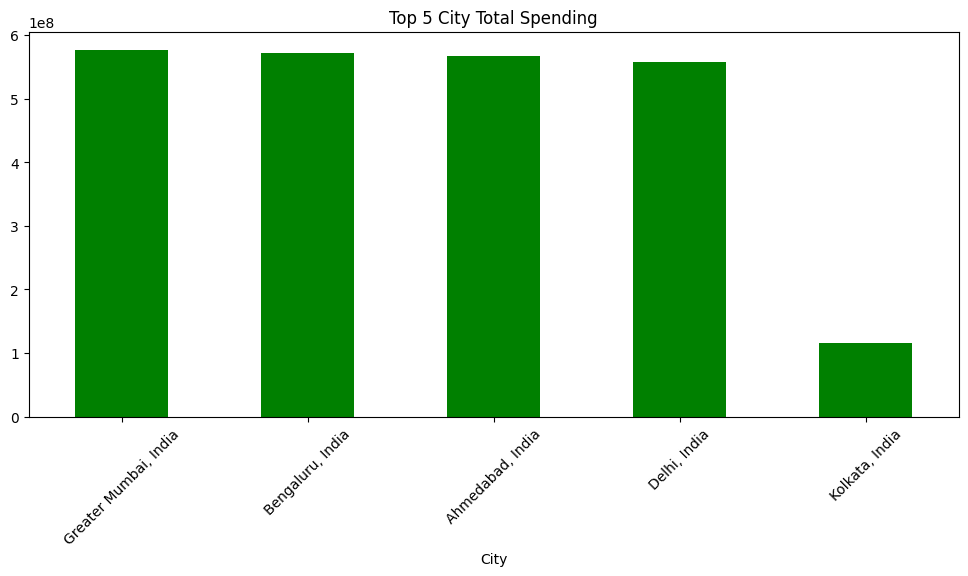

In [29]:
plt.figure(figsize=(12, 5))
total_city_spend.plot(kind='bar', color='green')
plt.title("Top 5 City Total Spending")
plt.xticks(rotation=45)
plt.show()

In [31]:
transaction_card_type = df['Card Type'].value_counts()
transaction_card_type

Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

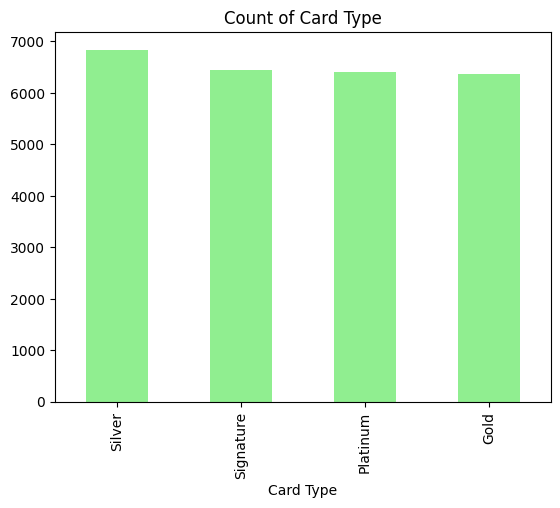

In [33]:
transaction_card_type.plot(kind='bar', color='lightgreen')
plt.title("Count of Card Type")
plt.show()

In [35]:
# Transaction Amount by Card
amount_by_card = df.groupby('Card Type')['Amount'].sum().sort_values(ascending=False)
amount_by_card

Card Type
Silver       1069613713
Signature    1013041105
Platinum     1007639019
Gold          984539536
Name: Amount, dtype: int64

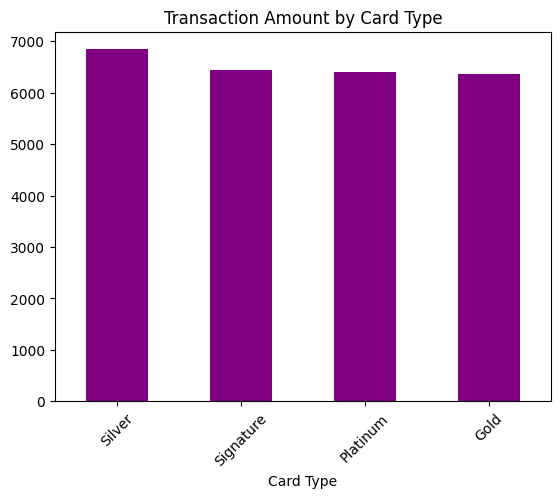

In [37]:
transaction_card_type.plot(kind='bar', color='purple')
plt.title("Transaction Amount by Card Type")
plt.xticks(rotation=45)
plt.show()

## Anamoly Detection

In [38]:
import numpy as np
from scipy import stats

In [43]:
# Z-Score for anamoly detection
z_score = np.abs(stats.zscore(df['Amount']))
df['Anomaly'] = z_score > 3

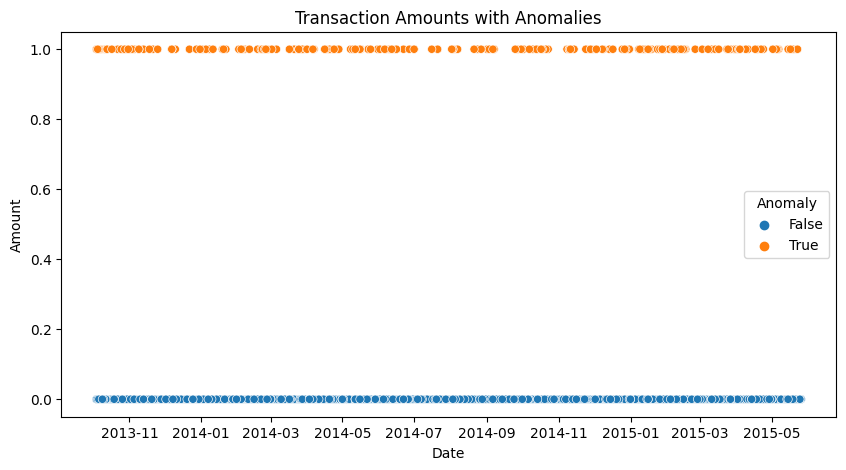

In [44]:
# Visualize anomalies
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Date'], y=df['Amount'], hue=df['Anomaly'])
plt.title("Transaction Amounts with Anomalies")
plt.show()

## Time Series Forecasting

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
## Monthly Aggregation
ts_data = df.set_index('Date').resample('M')['Amount'].sum()

In [48]:
## Fit ARIMA model
model = ARIMA(ts_data, order=(1, 1, 1))
results = model.fit()

In [49]:
## Forecast next 6 months
forecast = results.forecast(steps=6)
print(forecast)

2015-06-30    11.450765
2015-07-31    10.000420
2015-08-31    11.450345
2015-09-30    10.000841
2015-10-31    11.449925
2015-11-30    10.001261
Freq: M, Name: predicted_mean, dtype: float64


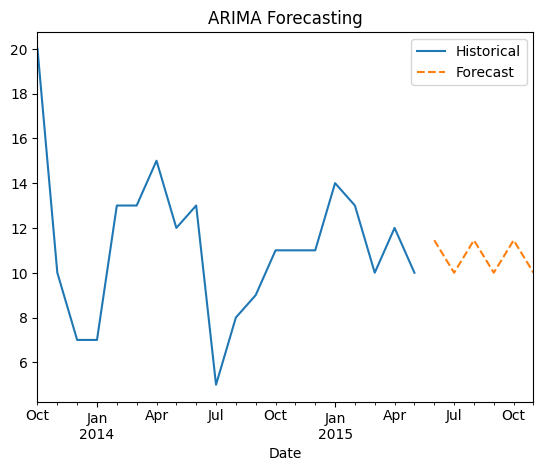

In [50]:
ts_data.plot(label='Historical')
forecast.plot(label='Forecast', linestyle='--')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

## Machine Learning Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Using encoded data
X = df_encoded.drop(columns=['Gender_M', 'Amount', 'Date', 'YearMonth'])
y = df_encoded['Gender_M']  # Predicting if Male

In [53]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
# Predictions & Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.54      0.55      0.55      4132
        True       0.49      0.48      0.48      3684

    accuracy                           0.52      7816
   macro avg       0.52      0.52      0.52      7816
weighted avg       0.52      0.52      0.52      7816

